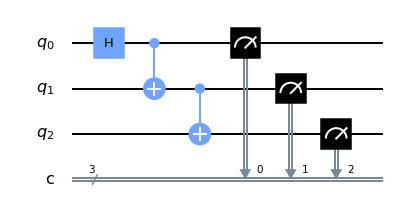

In [1]:
from qiskit import *
# Greenberger–Horne–Zeilinger GHZ

nqubits = 3
circuit = QuantumCircuit(nqubits, nqubits)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(1,2)
circuit.measure([0,1,2], [0,1,2])

circuit.draw(output='mpl')


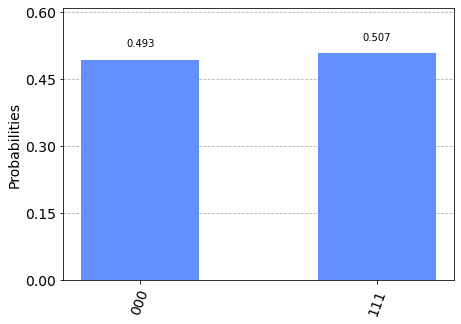

In [2]:
simulator = Aer.get_backend('qasm_simulator')
sim_result = execute(circuit, backend=simulator, shots=1024).result()
from qiskit.visualization import plot_histogram
plot_histogram(sim_result.get_counts(circuit))


/opt/conda/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


Job Status: job has successfully run


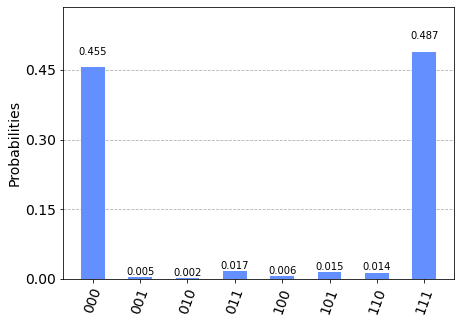

In [3]:

IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
device = provider.get_backend('ibmq_athens')  #ibmqx2

job = execute(circuit, backend=device, shots=1024)
#print(job.job_id())
from qiskit.tools.monitor import job_monitor
job_monitor(job)

device_result = job.result()
plot_histogram(device_result.get_counts(circuit))

In [4]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)

cal_circuits, state_labels = complete_meas_cal(qr=circuit.qregs[0],circlabel='measurement_calibration')

In [5]:
print(state_labels)

['000', '001', '010', '011', '100', '101', '110', '111']


In [6]:
print(len(cal_circuits))

8


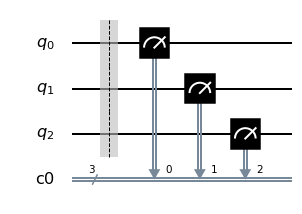

In [7]:
cal_circuits[0].draw()

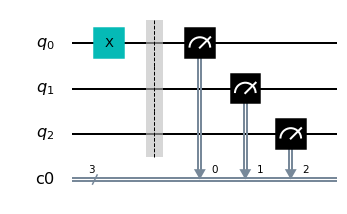

In [8]:
cal_circuits[1].draw()

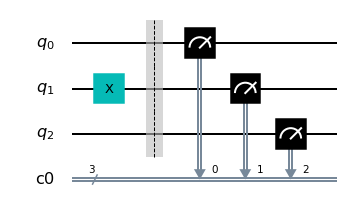

In [9]:
cal_circuits[2].draw()

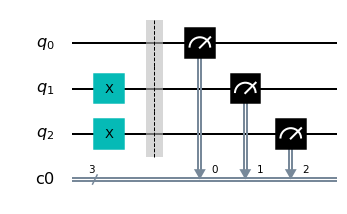

In [10]:
cal_circuits[6].draw()

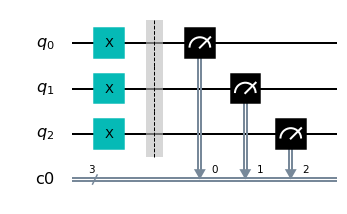

In [11]:
cal_circuits[7].draw()

In [12]:
cal_job = execute(cal_circuits,
             backend=device,
             shots=8192,
             optimization_level=0)
#print(cal_job.job_id())
job_monitor(cal_job)
cal_results = cal_job.result()

Job Status: job has successfully run


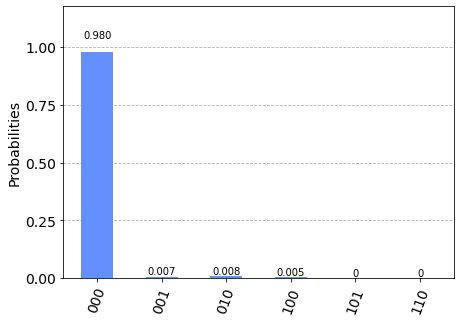

In [13]:
plot_histogram(cal_results.get_counts(cal_circuits[0]))

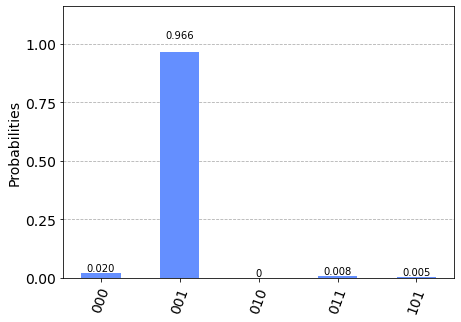

In [14]:
plot_histogram(cal_results.get_counts(cal_circuits[1]))

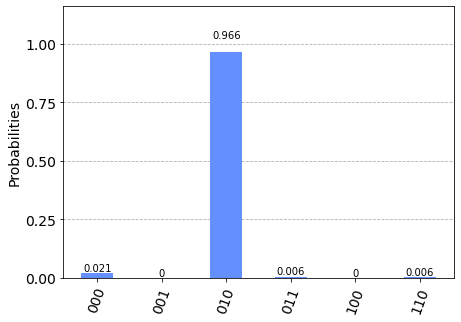

In [15]:
plot_histogram(cal_results.get_counts(cal_circuits[2]))

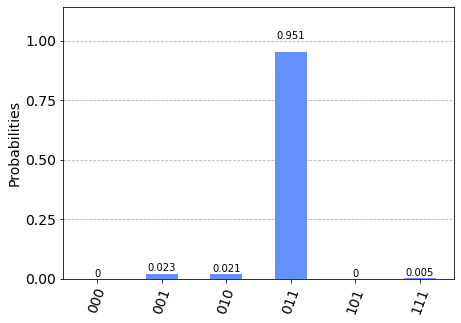

In [16]:
plot_histogram(cal_results.get_counts(cal_circuits[3]))

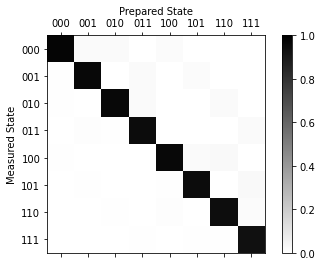

In [17]:
#Creating the Measurement Fitter Object in Ignis
meas_fitter = CompleteMeasFitter(cal_results, state_labels)
meas_fitter.plot_calibration()

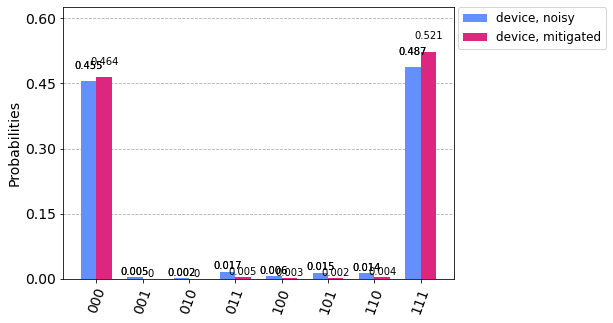

In [18]:
meas_filter = meas_fitter.filter

# Mitigating the measurement errors in our previous device run
mitigated_result = meas_filter.apply(device_result)
device_counts = device_result.get_counts(circuit)
mitigated_counts = mitigated_result.get_counts(circuit)

plot_histogram([device_counts, mitigated_counts], legend=['device, noisy', 'device, mitigated'])

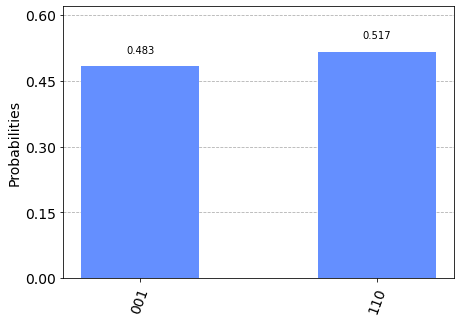

In [20]:
#Running error mitigation on a second circuit
circuit2 = QuantumCircuit(3,3)
circuit2.x(1)
circuit2.h(0)
circuit2.cx(0,1)
circuit2.cx(1,2)
circuit2.measure([0,1,2], [0,1,2])
circuit2.draw(output='mpl')

plot_histogram(execute(circuit2, backend=simulator, shots=1024).result().get_counts(circuit2))

In [ ]:
job_2 = execute(circuit2, backend=device, shots=1024)

job_monitor(job_2)

device_counts_2 = job_2.result().get_counts(circuit2)

plot_histogram(device_counts_2)

In [ ]:
mitigated_counts_2 = meas_filter.apply(device_counts_2)

plot_histogram([device_counts_2, mitigated_counts_2], legend=['device, noisy','device, mitigated'])